# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- install
    - 윈도우는 Visual C++ Build Tool 먼저 설치
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader
    - conda install -c conda-forge prophet
    - pip install prophet

---

## 함수(def)의 기초

In [1]:
def test_def(a, b):
    return a + b

In [2]:
c = test_def(2, 3)
c

5

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 입력 인자(a, b)를 정해준다
- 출력(return)을 작성

In [3]:
# 전역변수(global)
a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i

In [4]:
edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

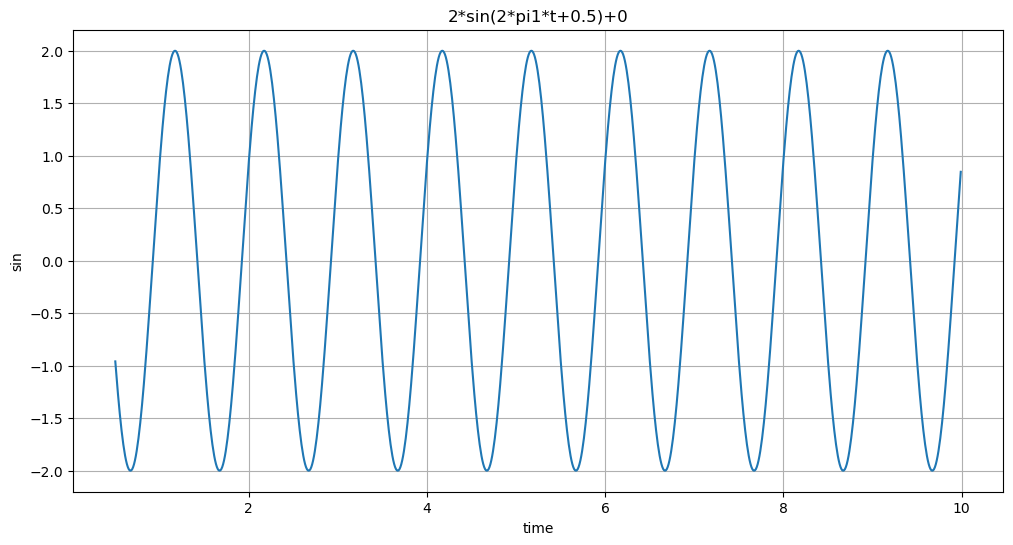

In [7]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [8]:
def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """

    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

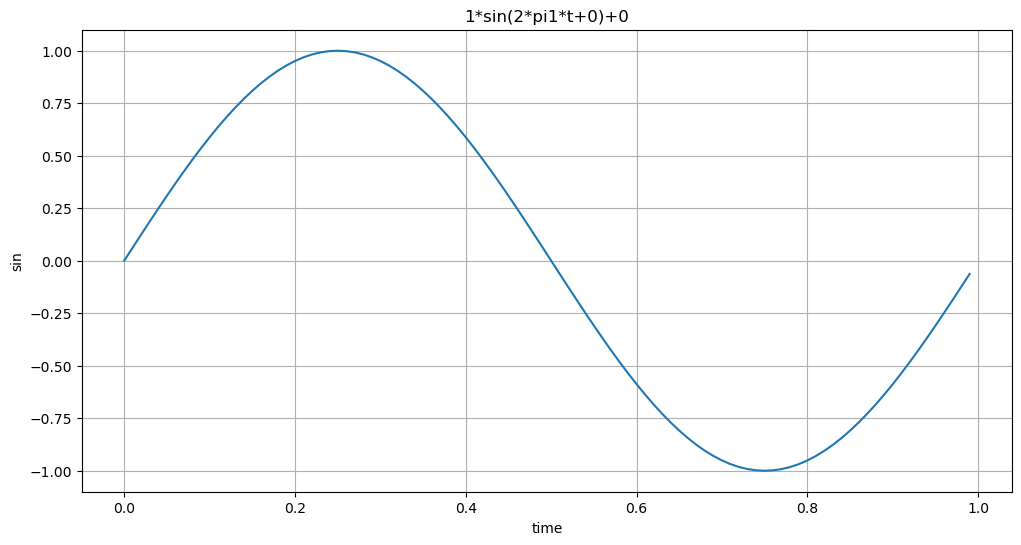

In [9]:
plotSinWave()

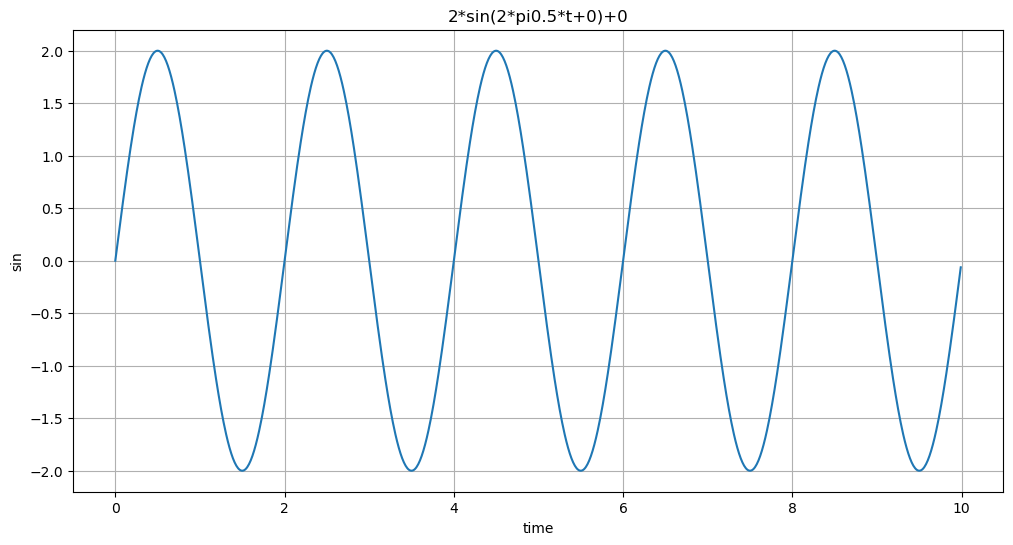

In [10]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinWave

In [11]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """

    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph!!")
    plotSinWave(amp=2, endTime=2)


Overwriting ./drawSinWave.py


In [12]:
import drawSinWave as dS

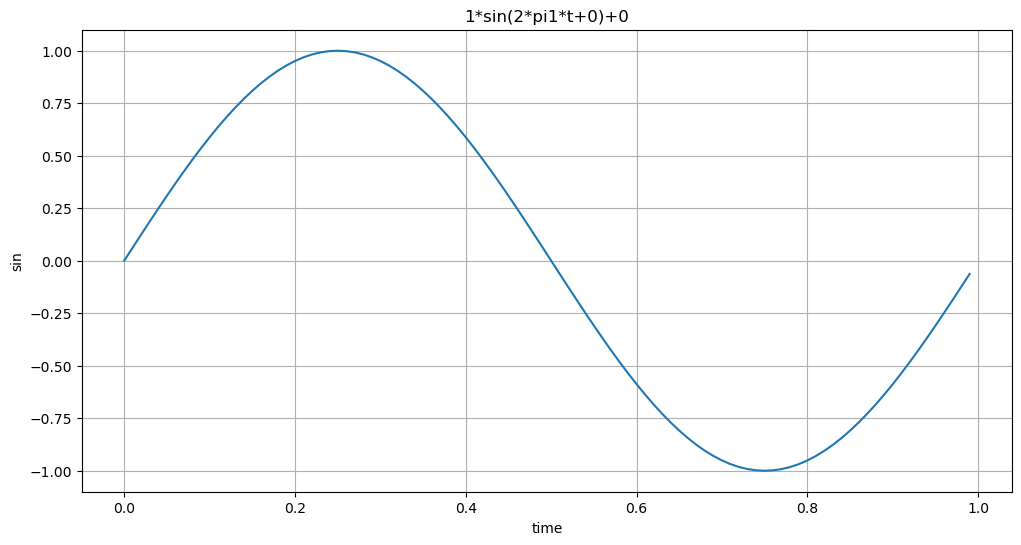

In [13]:
dS.plotSinWave()

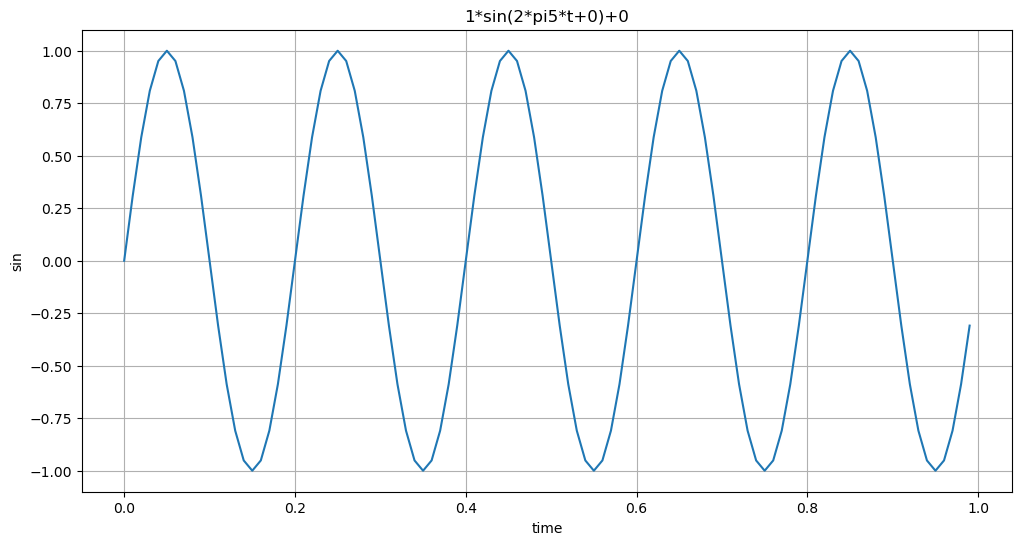

In [14]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정

In [15]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")

plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib_hangul.py


In [16]:
import set_matplotlib_hangul

Hangul OK in your Windows!!!


---

## 2. prophet 기초

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 예제 1

In [18]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds" : ds, "y":result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


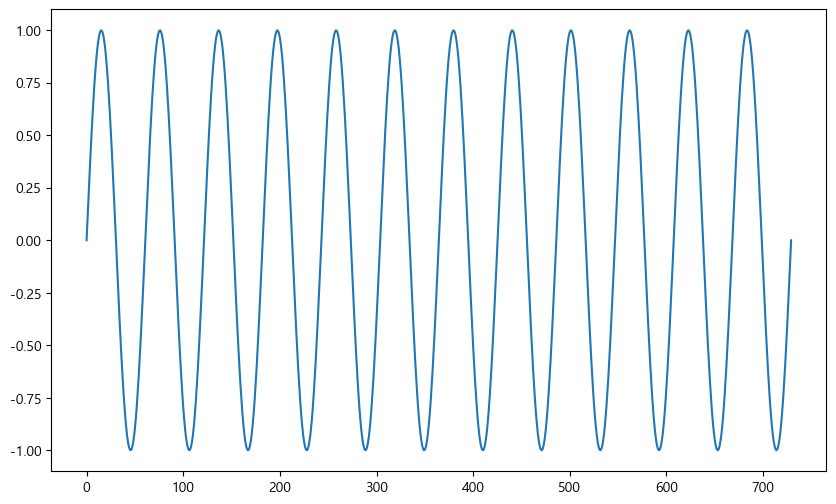

In [19]:
df["y"].plot(figsize=(10,6));

In [20]:
from prophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Importing plotly failed. Interactive plots will not work.
14:04:49 - cmdstanpy - INFO - Chain [1] start processing
14:04:49 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

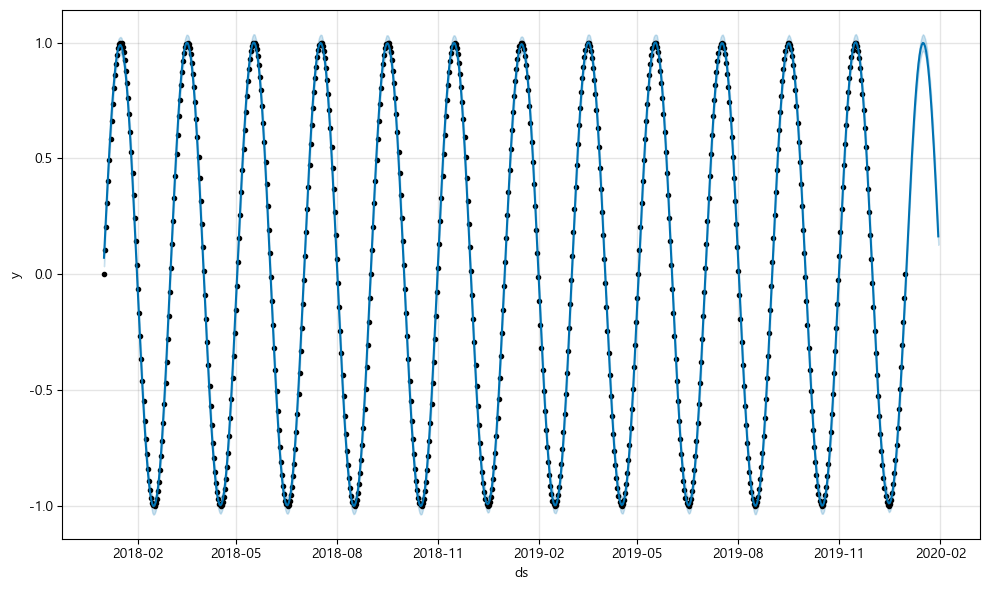

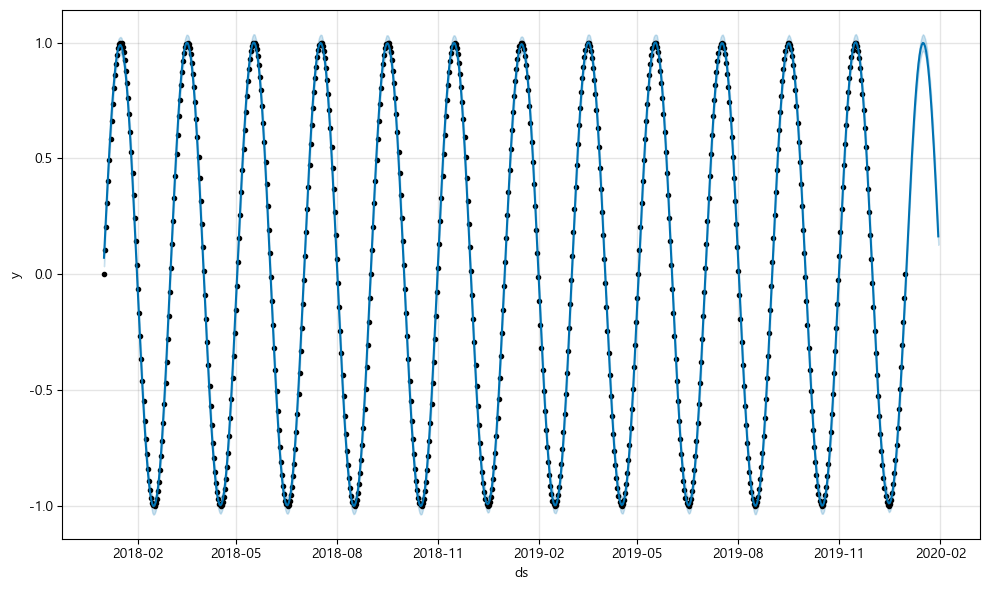

In [22]:
m.plot(forecast)

<Axes: >

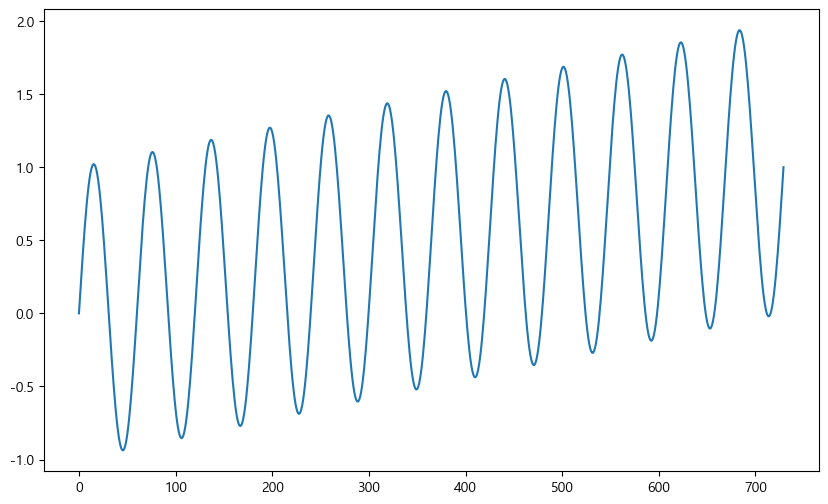

In [23]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds" : ds, "y":result})
df["y"].plot(figsize=(10,6))

14:08:21 - cmdstanpy - INFO - Chain [1] start processing
14:08:21 - cmdstanpy - INFO - Chain [1] done processing


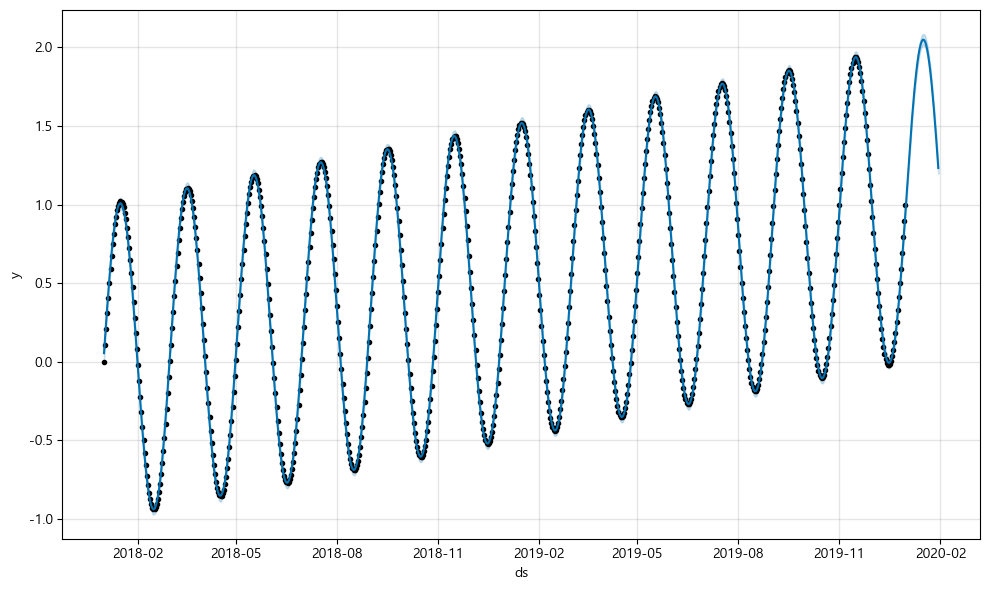

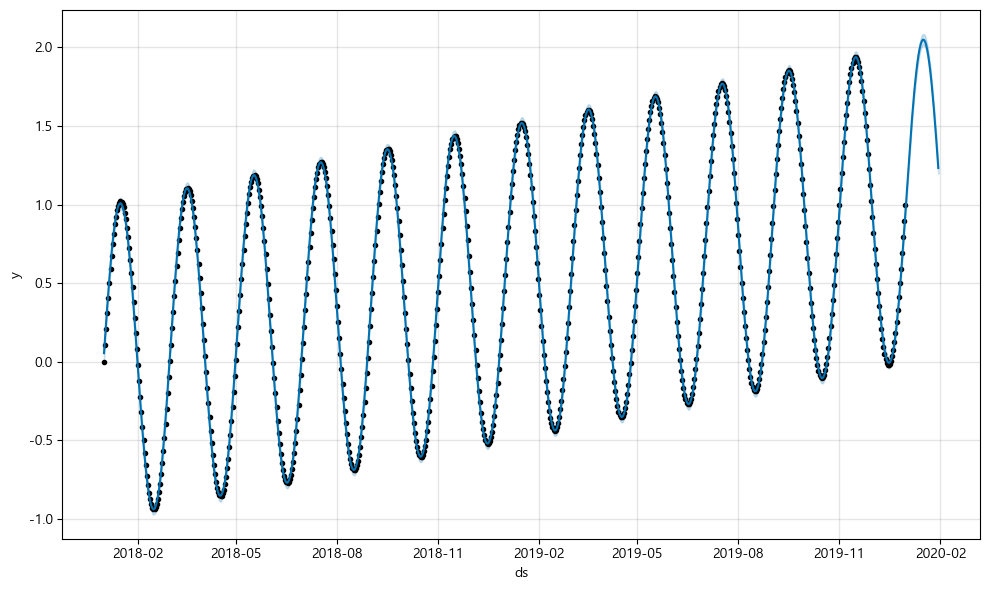

In [24]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

#### 예제 3

<Axes: >

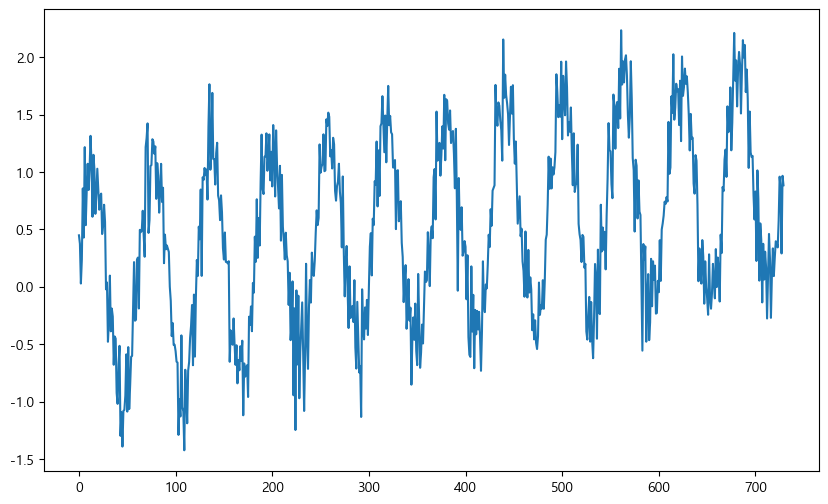

In [25]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds" : ds, "y":result})
df["y"].plot(figsize=(10,6))

14:09:57 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1] done processing


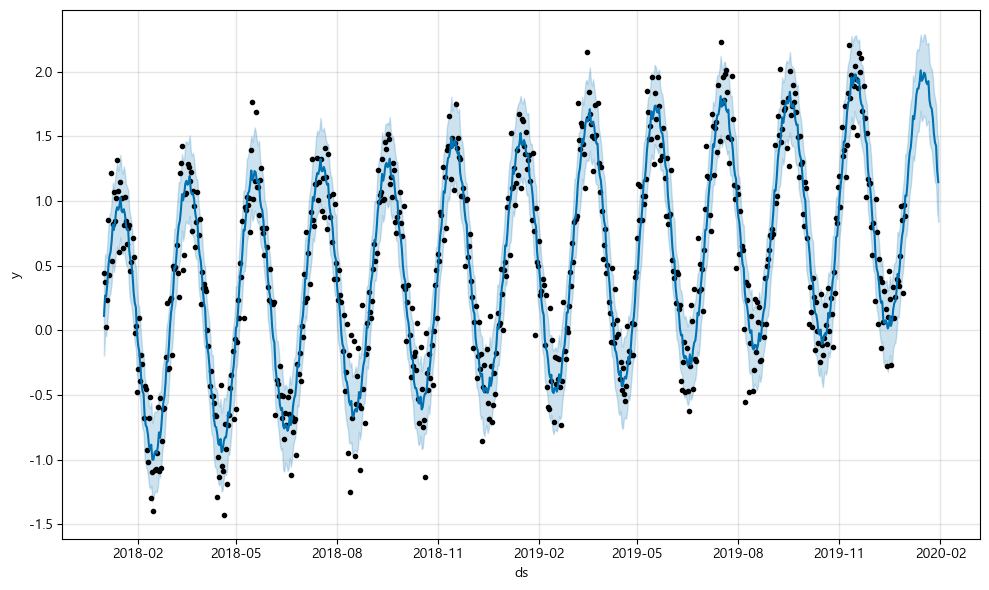

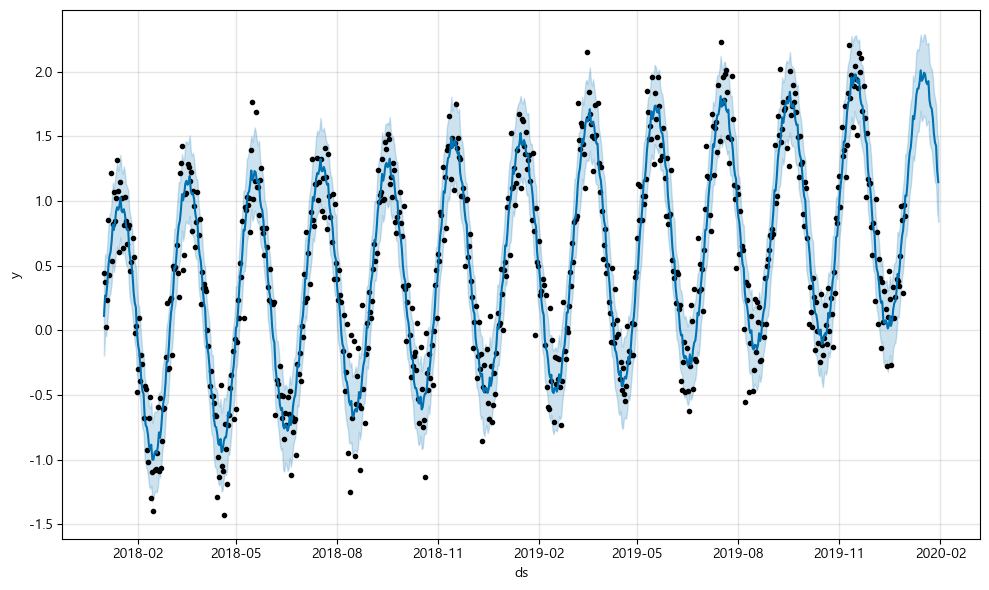

In [26]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## 3. 시계열 데이터 실전 이용해보기
- https://pinkwink.kr/

In [27]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

%matplotlib inline

In [32]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<Axes: xlabel='date'>

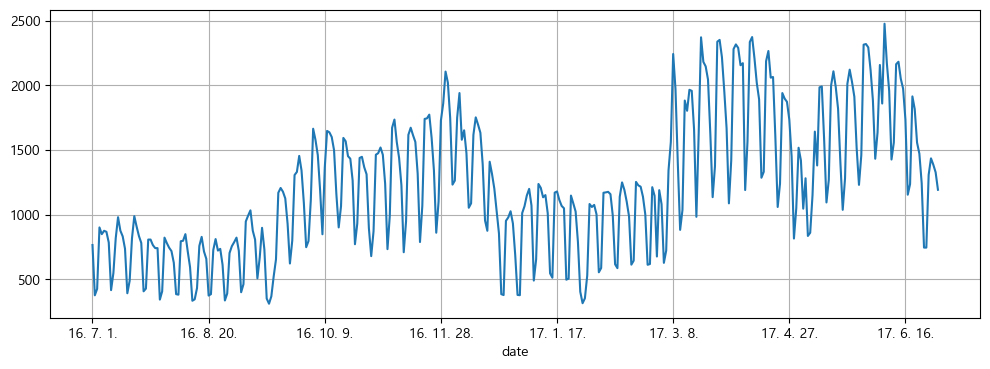

In [33]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12,4), grid=True)

In [36]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

In [38]:
# 에러를 계산할 함수

def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [39]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)


In [41]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.5328046676293
330.47773079342267


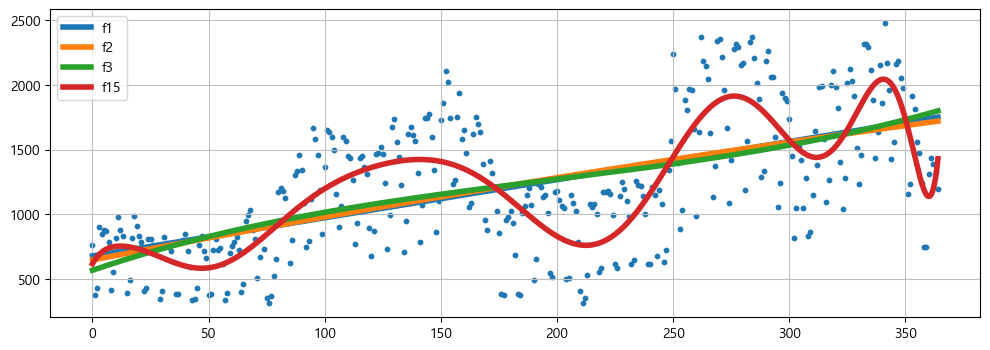

In [42]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [43]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y":pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [44]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

14:35:10 - cmdstanpy - INFO - Chain [1] start processing
14:35:10 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [47]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,921.853195,711.804131,1145.782319
421,2017-08-26,506.954908,305.089781,698.963572
422,2017-08-27,639.454293,434.866412,852.804010
423,2017-08-28,1191.944049,967.951413,1417.557972
424,2017-08-29,1227.806799,1029.636242,1436.565657


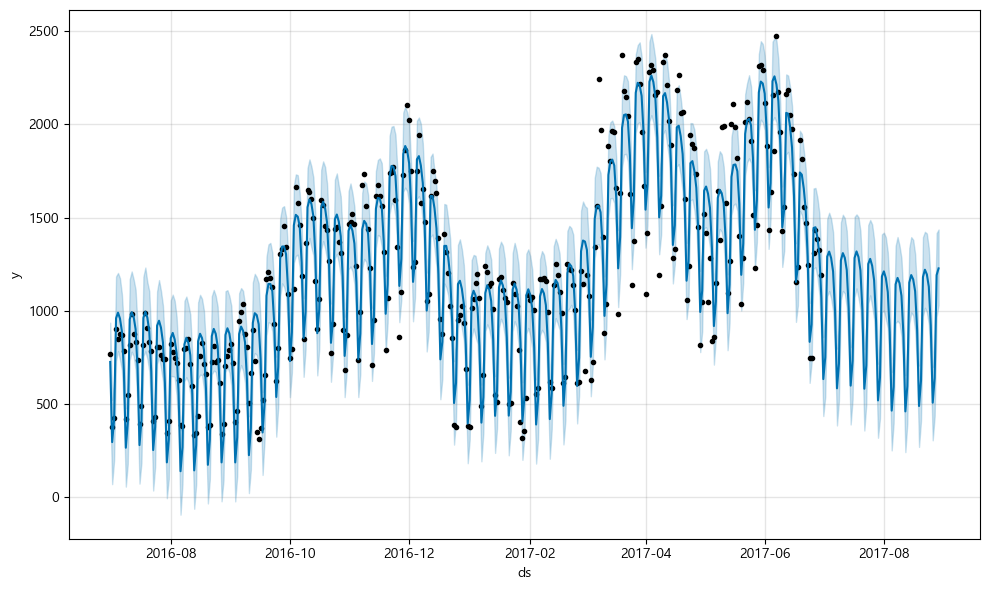

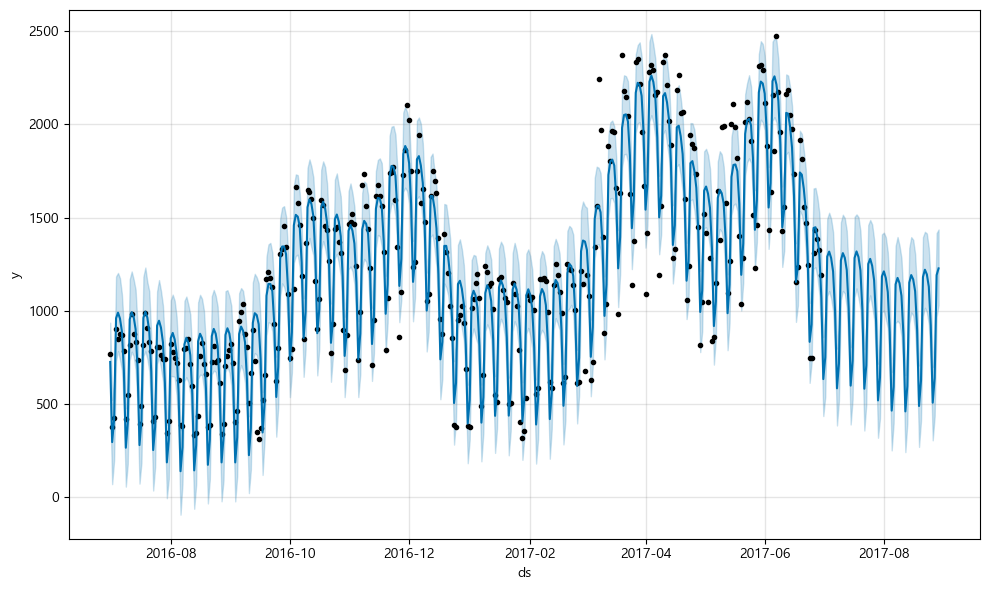

In [48]:
m.plot(forecast)

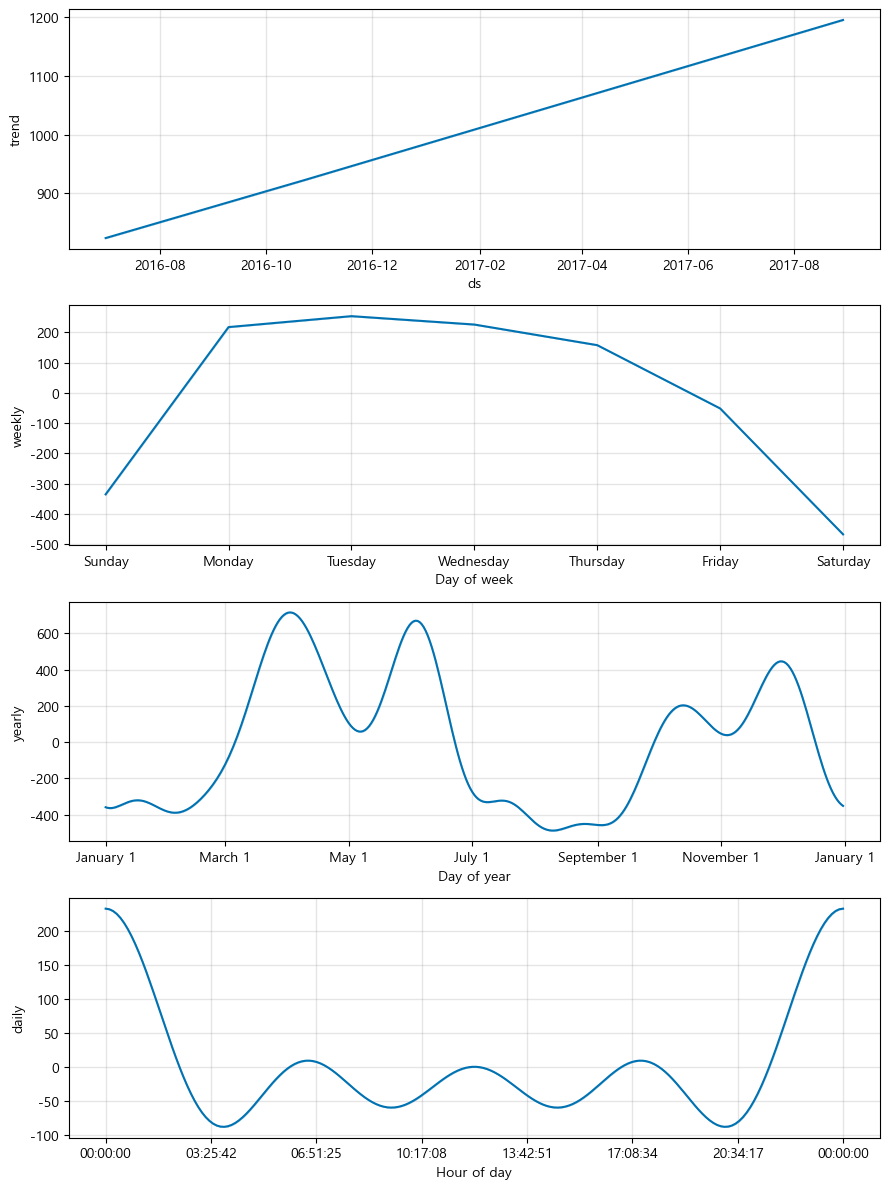

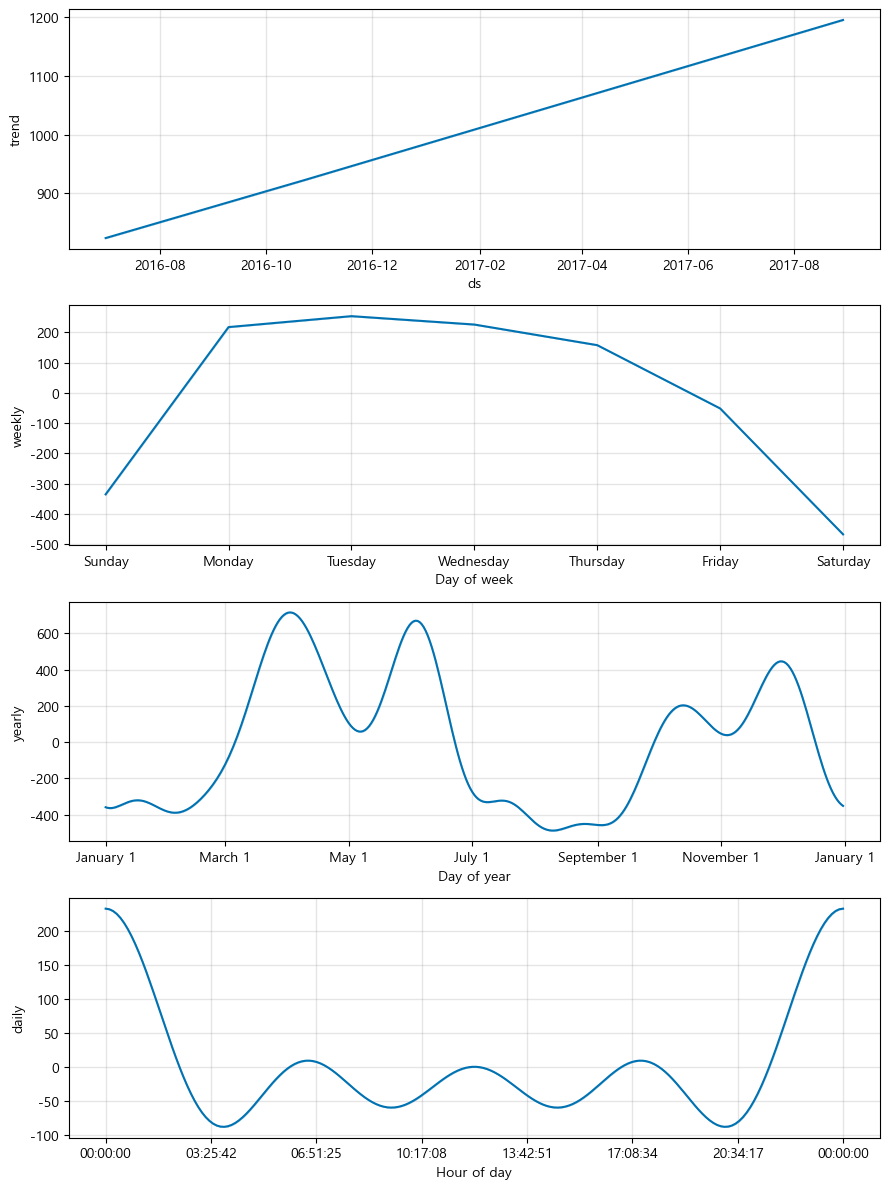

In [49]:
m.plot_components(forecast)